# 종합실습2 이변량분석(y-숫자) : car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## 1.환경준비

### (1) 라이브러리 로딩

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

### (2) 데이터 로딩

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|



In [3]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


In [4]:
target = 'Sales'

## 1.숫자형 X --> Y

* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

### (1) Advertising -> Sales

1) 시각화 : scatter(reg)plot, jointplot

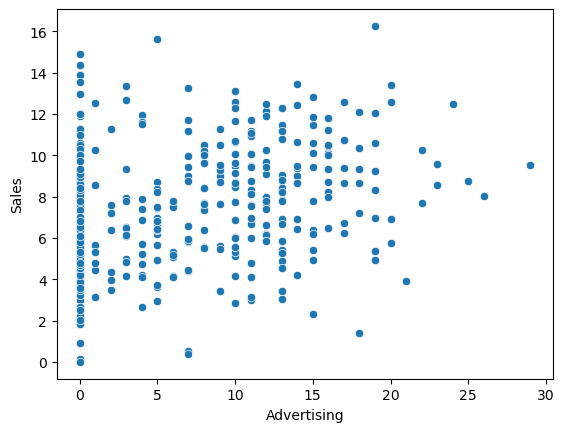

In [5]:
var = 'Advertising'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

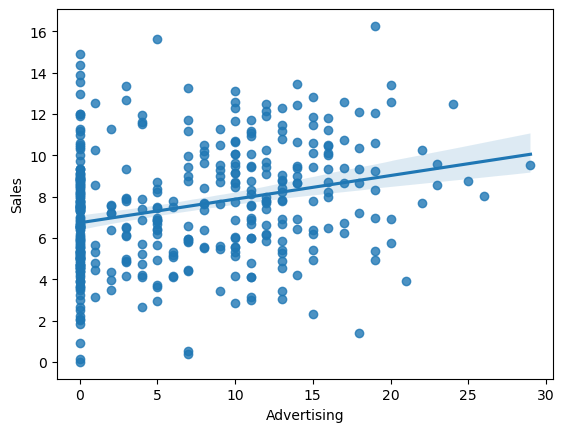

In [6]:
sns.regplot(x=var, y = target, data = data)
plt.show()

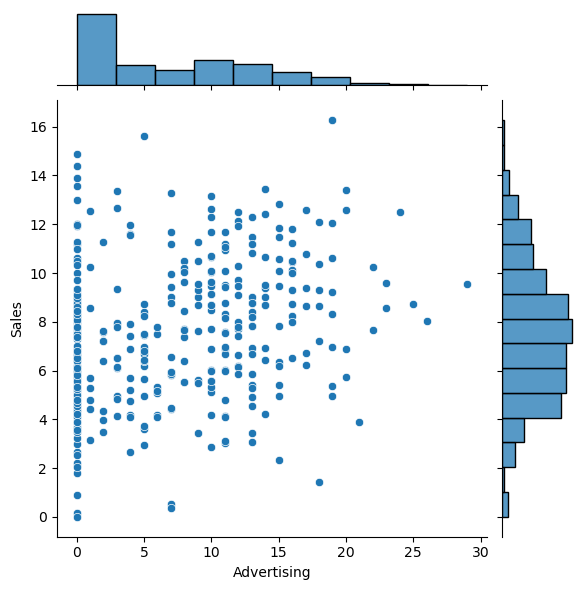

In [7]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [8]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.269506781376902, p-value : 4.377677110302732e-08


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 0을 빼고 다시 해봐야 겠다.
* 광고와 세일즈는 약한 상관관계가 있다., pv로 볼때 유의미한 값으로 판단됨.

### (2) Population -> Sales

1) 시각화 : scatter

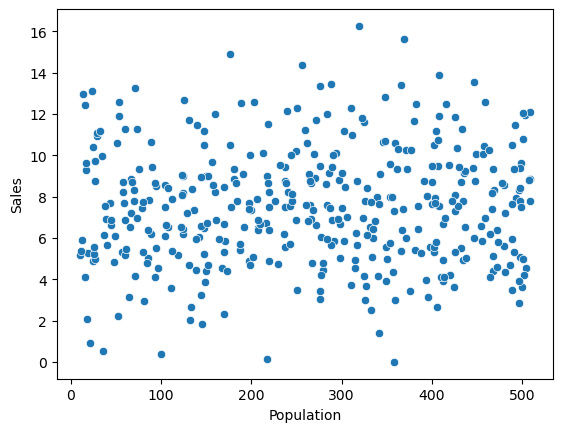

In [12]:
var = 'Population'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

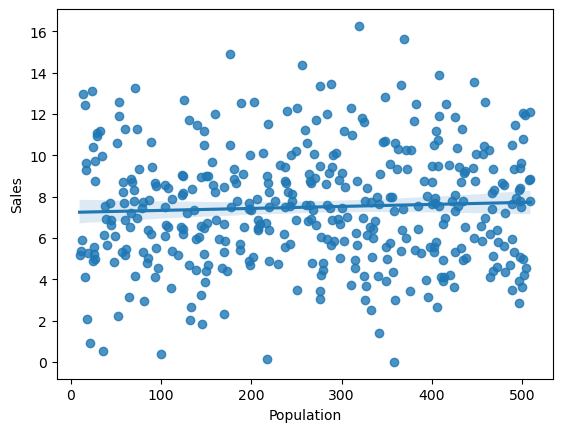

In [13]:
sns.regplot(x=var, y = target, data = data)
plt.show()

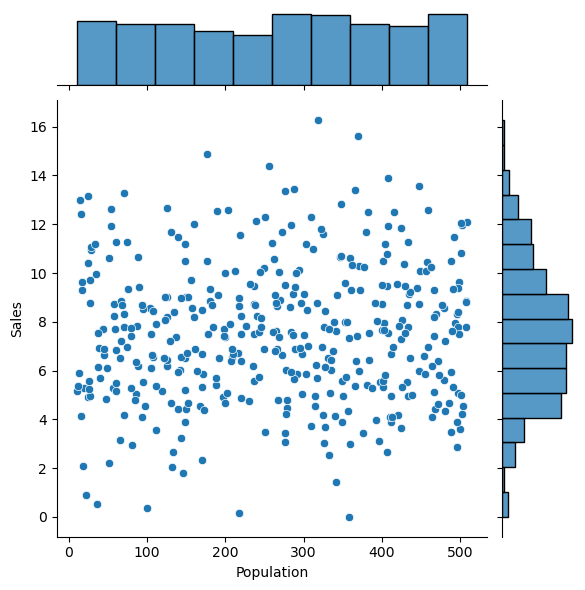

In [14]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [16]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.0504709844720392, p-value : 0.31398160931903


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### (3) Price -> Sales

1) 시각화 : scatter

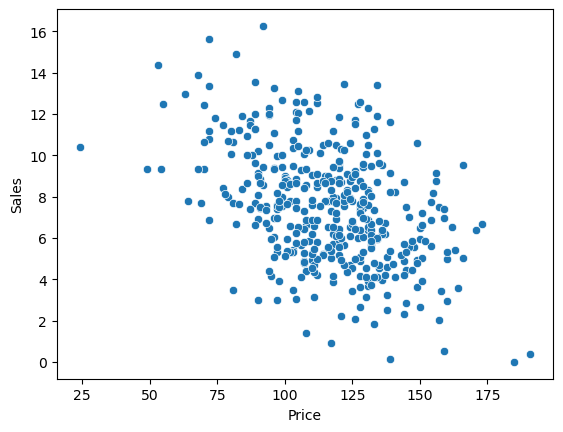

In [17]:
var = 'Price'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

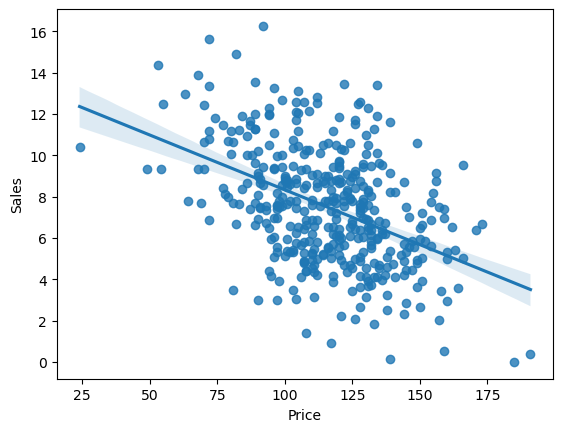

In [18]:
sns.regplot(x=var, y = target, data = data)
plt.show()

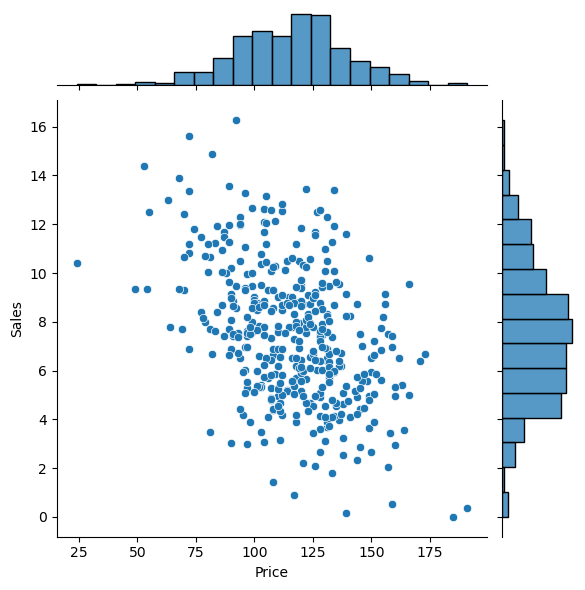

In [19]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [20]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.4449507278465726, p-value : 7.61818701191294e-21


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### (4) Age -> Sales

1) 시각화 : scatter

2) 수치화 : 상관분석

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### (5) CompPrice -> Sales

1) 시각화 : scatter

2) 수치화 : 상관분석

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### (6) Income -> Sales

1) 시각화 : scatter

2) 수치화 : 상관분석

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

## 2.범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

### (1) ShelveLoc-> Sales

1) 시각화 : 평균비교 barplot

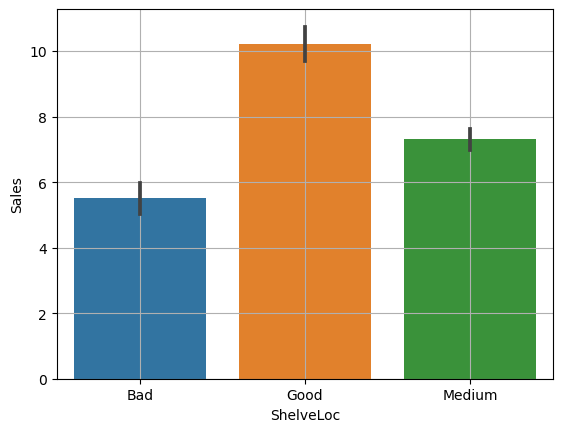

In [11]:
var = 'ShelveLoc'

sns.barplot(x=var, y=target, data = data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [10]:
d_b = data.loc[data[var]=='Bad', target]
d_m = data.loc[data[var]=='Medium', target]
d_g = data.loc[data[var]=='Good', target]

spst.f_oneway(d_b, d_m, d_g)

F_onewayResult(statistic=92.22990509910348, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### (2) Urban -> Sales

1) 시각화 : 평균비교 barplot

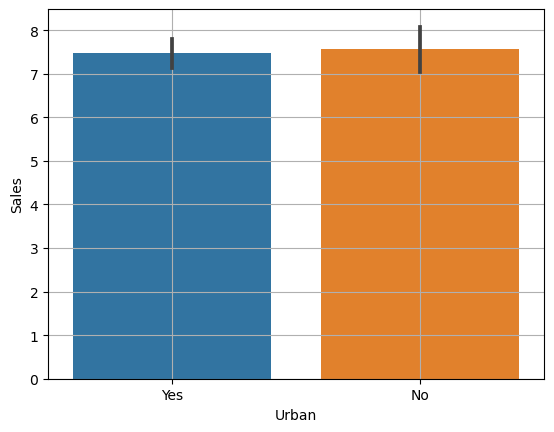

In [21]:
var = 'Urban'

sns.barplot(x=var, y=target, data = data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [22]:
d_b = data.loc[data[var]=='Yes', target]
d_m = data.loc[data[var]=='No', target]

spst.f_oneway(d_b, d_m)

F_onewayResult(statistic=0.09465065557659712, pvalue=0.7585069603942085)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### (3) US-> Sales

1) 시각화 : 평균비교 barplot

2) 수치화 : t-test, anova

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

## 3.관계 정리하기

① 강한관계

Diff_Price, ShelveLoc

② 중간관계

Age, Income, Price, USM Adv

③ 관계없음

Pop, ComPrice, Urban